In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import datasets
import seaborn as sns
import pandas as pd

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
iris = sns.load_dataset('iris')

In [4]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# Separating out the features
x = iris.loc[:, features].values
# Separating out the target
y = iris.loc[:,['species']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [6]:
pca = PCA(n_components=3)

In [7]:
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [8]:
principalDf

,principal component 1,principal component 2,principal component 3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738
...,...,...,...
145,1.870503,0.386966,0.256274
146,1.564580,-0.896687,-0.026371
147,1.521170,0.269069,0.180178
148,1.372788,1.011254,0.933395


In [9]:
finalDf = pd.concat([principalDf, iris[['species']]], axis = 1)

In [10]:
finalDf

,principal component 1,principal component 2,principal component 3,species
0,-2.264703,0.480027,-0.127706,setosa
1,-2.080961,-0.674134,-0.234609,setosa
2,-2.364229,-0.341908,0.044201,setosa
3,-2.299384,-0.597395,0.091290,setosa
4,-2.389842,0.646835,0.015738,setosa
...,...,...,...,...
145,1.870503,0.386966,0.256274,virginica
146,1.564580,-0.896687,-0.026371,virginica
147,1.521170,0.269069,0.180178,virginica
148,1.372788,1.011254,0.933395,virginica


In [14]:
setosadf=finalDf[finalDf['species']=='setosa']

In [15]:
versicolordf=finalDf[finalDf['species']=='versicolor']

In [16]:
virginicadf=finalDf[finalDf['species']=='virginica']

In [23]:
colors = ['r', 'g', 'b']

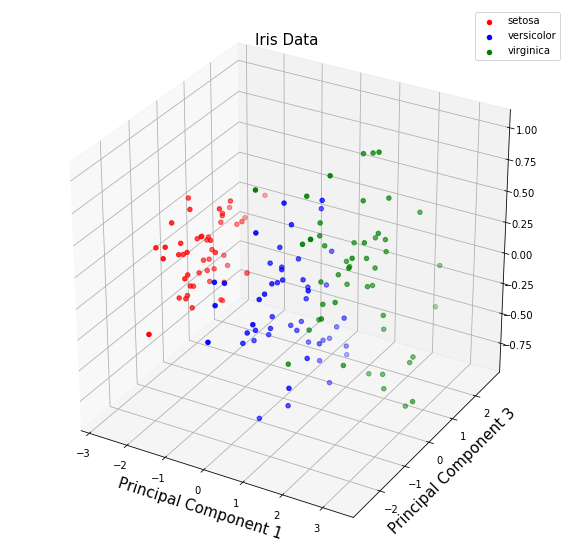

In [22]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
targets = ['setosa', 'versicolor', 'virginica']
ax.set_title('Iris Data', fontsize = 15)

ax.scatter(setosadf['principal component 1'],setosadf['principal component 2'],setosadf['principal component 3'],c='r', marker='o')
ax.scatter(versicolordf['principal component 1'],versicolordf['principal component 2'],versicolordf['principal component 3'],c='b', marker='o')
ax.scatter(virginicadf['principal component 1'],virginicadf['principal component 2'],virginicadf['principal component 3'],c='g', marker='o')
ax.legend(targets)
ax.grid()

